In [1]:
library("IceCast")

Loading required package: rgeos
rgeos version: 0.3-26, (SVN revision 560)
 GEOS runtime version: 3.6.2-CAPI-1.10.2 0 
 Linking to sp version: 1.2-7 
 Polygon checking: TRUE 

Loading required package: sp


In [2]:
library("fields")

Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.1-4 (2018-04-12) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: 'spam'

The following objects are masked from 'package:base':

    backsolve, forwardsolve

Loading required package: maps
See www.image.ucar.edu/~nychka/Fields for
 a vignette and other supplements. 


In [ ]:
##Not run##
quickRun(obsNCDF = "/obs.nc", predNCDF = "/pred.nc", predYears = c(2001:2013), 
         startYear = 1980, month = 2, outputFile = "/outputFile.nc", level = 15,
         datTypeObs = "bootstrap")

In [44]:
rawData <- readBootstrap("/home/disk/sipn/nicway/data/obs/NSIDC_0079/native/bt_20010216_f13_v03_n.bin")

In [20]:
##Not run##
observed <- readMonthlyBS(startYear = 2000,endYear = 2012,  fileFolder = "/home/disk/sipn/nicway/data/obs/NSIDC_0079/native/")
#obsFeb <- observed[, 2, , ] #Use February data only 

ERROR: Error in file(fileName, "rb"): invalid 'description' argument


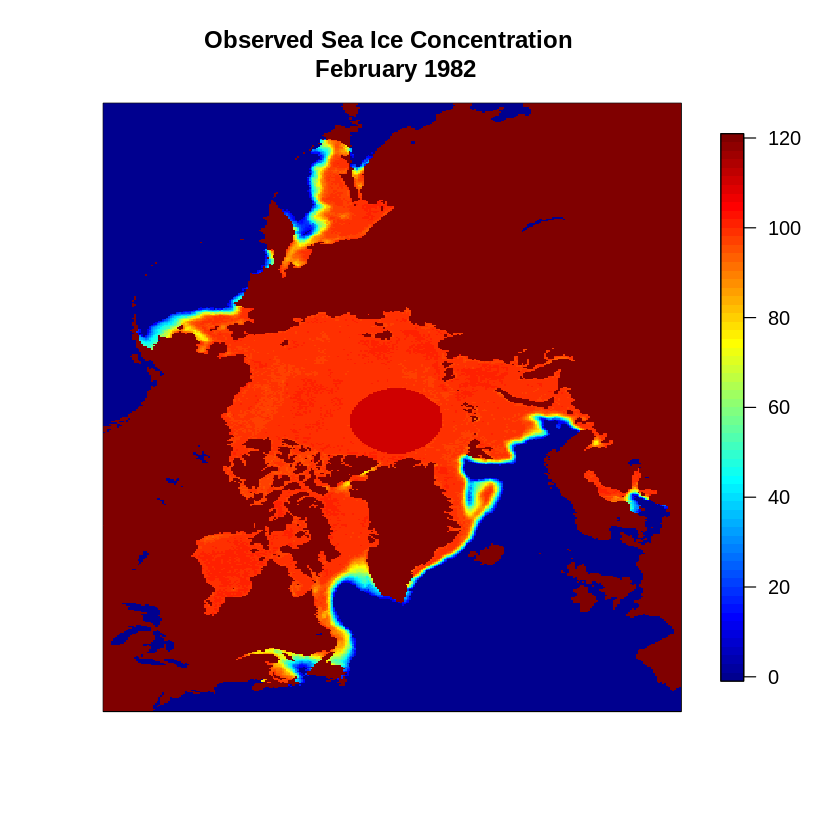

In [22]:
image.plot(obsFeb19811982[length(1981:1982),,], 
           main = "Observed Sea Ice Concentration \n February 1982", 
           xaxt = "n", yaxt = "n")

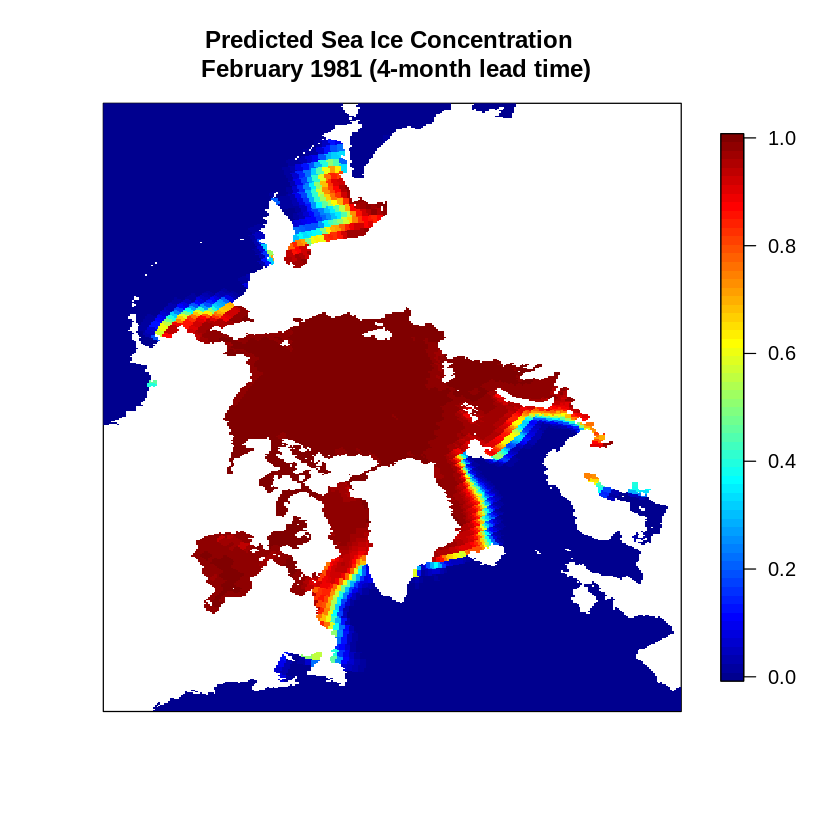

In [23]:
image.plot(emFeb19811982[length(1980:1981),,], 
           main = "Predicted Sea Ice Concentration \n February 1981 (4-month lead time)",
           xaxt = "n", yaxt = "n")

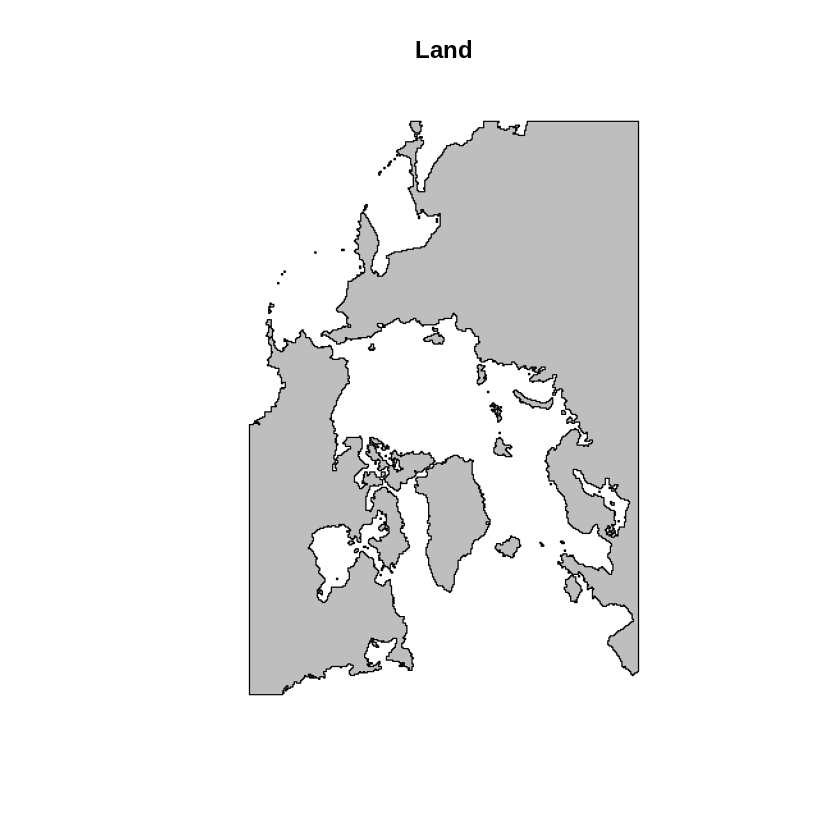

In [24]:
land <- getRegion(dat = emFeb19811982[2, ,], datType = "gfdl", landInd = TRUE)
plot(land, col = "grey", main = "Land")

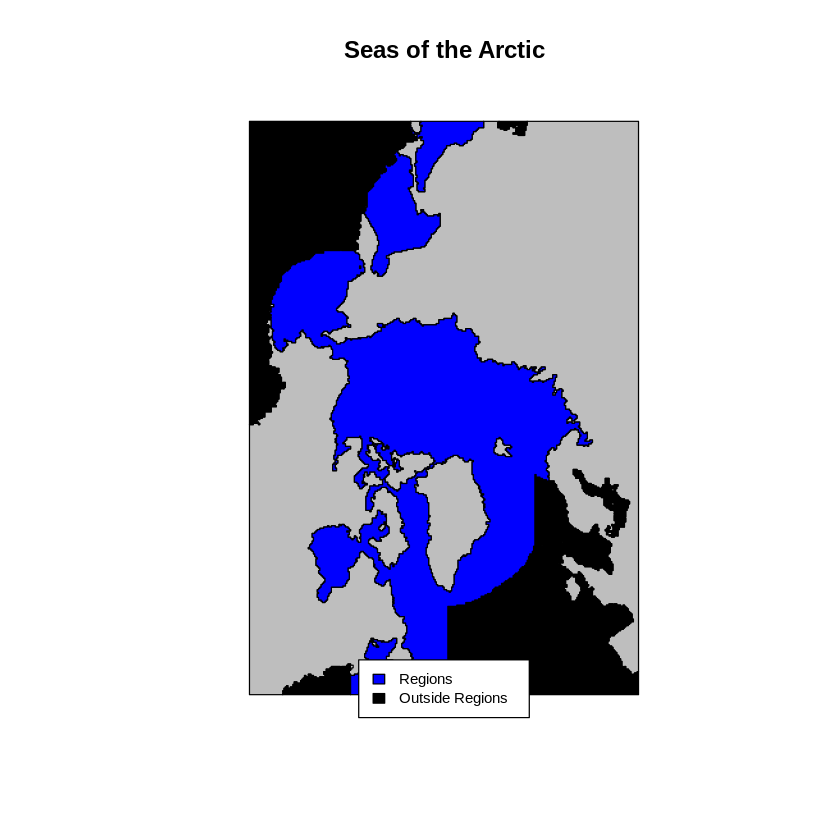

In [25]:
plot(land, col = "grey", main = "Seas of the Arctic")
plot(bgWater, col = "black", add = T)
plot(allRegions, col = "blue", add = T)
legend("bottom", fill = c("blue", "black"), cex = 0.75,
       legend = c("Regions", "Outside Regions"))

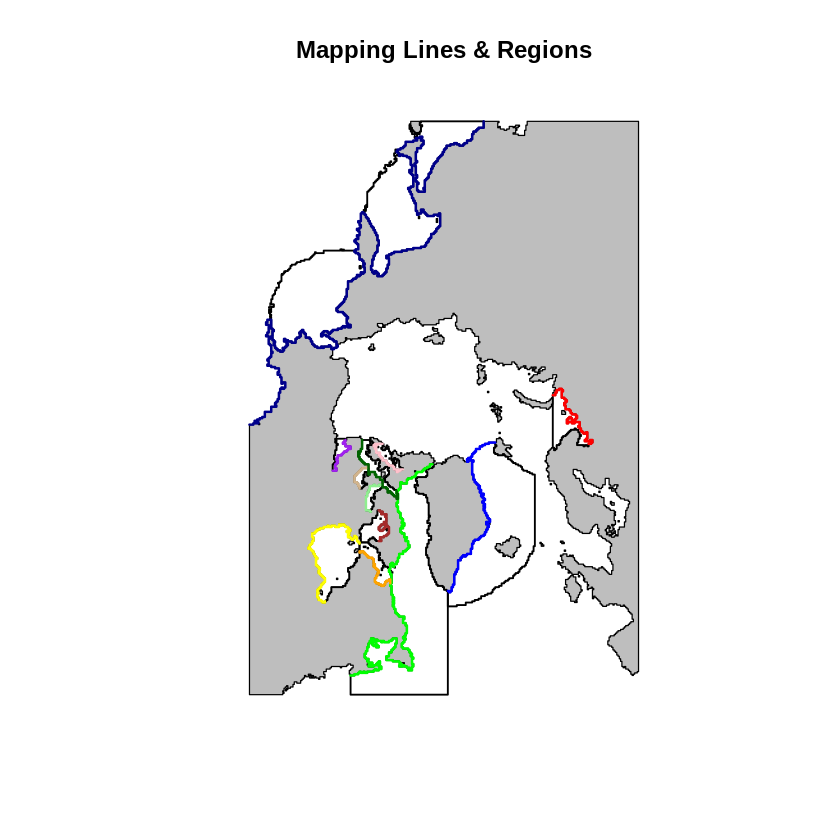

In [26]:
colors <- c("darkblue", "green", "blue", "red", "orange", "yellow", 
            "purple", "pink", "lightgreen", "brown", "tan", "darkgreen", 
            "hotpink", "navy", "beige")
plot(land, col = "grey", main = "Mapping Lines & Regions")
for (i in 1:length(regionInfo$regions)) {
  plot(regionInfo$regions[[i]], add = T, lwd = 1.5)
}
for (i in 1:length(regionInfo$lines)) {
  plot(regionInfo$lines[[i]], col = colors[i], add = T, lwd = 2)
}

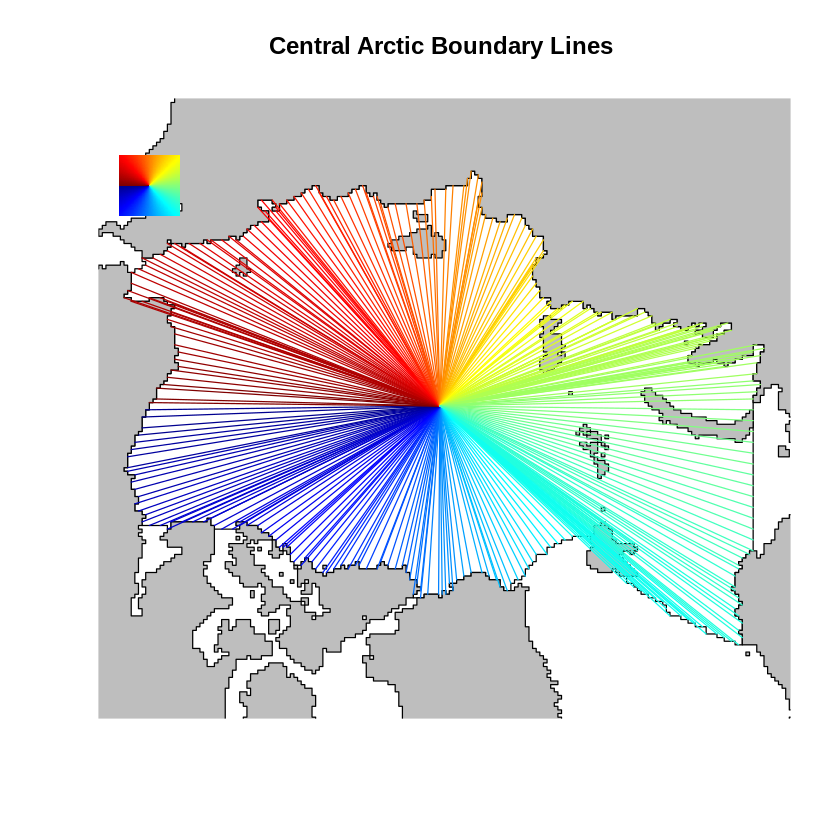

In [27]:
#Find angle of mapping line (and color code)
nLines <- length(regionInfo$centLines)
ang <- rep(NA, nLines)
for (i in 1:nLines) {
  temp <- regionInfo$centLines[[i]]@lines[[1]]@Lines[[1]]@coords
  nTemp <- nrow(temp)
  ang[i] <- atan2(temp[nTemp, 2] - temp[1, 2], temp[nTemp, 1] - temp[1, 1])
} 
bp <- seq(-pi, pi, length.out = 65)
angCol <- tim.colors(64)[as.numeric(cut(ang, breaks = bp))]

#plot region and lines 
plot(regionInfo$centRegion, main = "Central Arctic Boundary Lines ")
plot(land, add = T, col = "grey")
for (s in 1:length(regionInfo$centLines)) {
  if (s%%3 == 0) {
    plot(regionInfo$centLines[[s]], col = angCol[s], add = T)
  }
}

#Add legend
x <- y <- seq(-1, 1, .01)
grid <- expand.grid(x, y)
angle <- apply(grid, 1, function(x){atan2(x[2], x[1])})
legVals <- matrix(nrow = length(x), length(y), data = angle)
add.image(-2100, 2000, legVals, image.width = .1, image.height = .1)

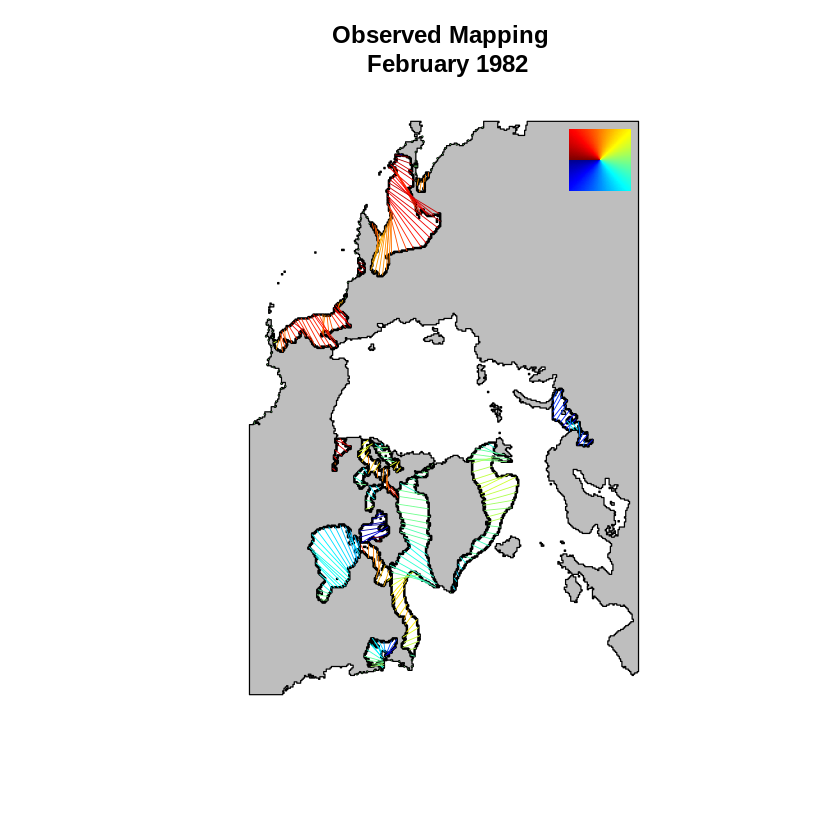

In [28]:
obs <- getRegion(dat = obsFeb19811982[length(1981:1982), ,], datType = "bootstrap", level = 15)
obsMap <- getMap(ice = obs, plotting = TRUE, main = "Observed Mapping \n February 1982")

[1] "Mapping for year 1981 complete"


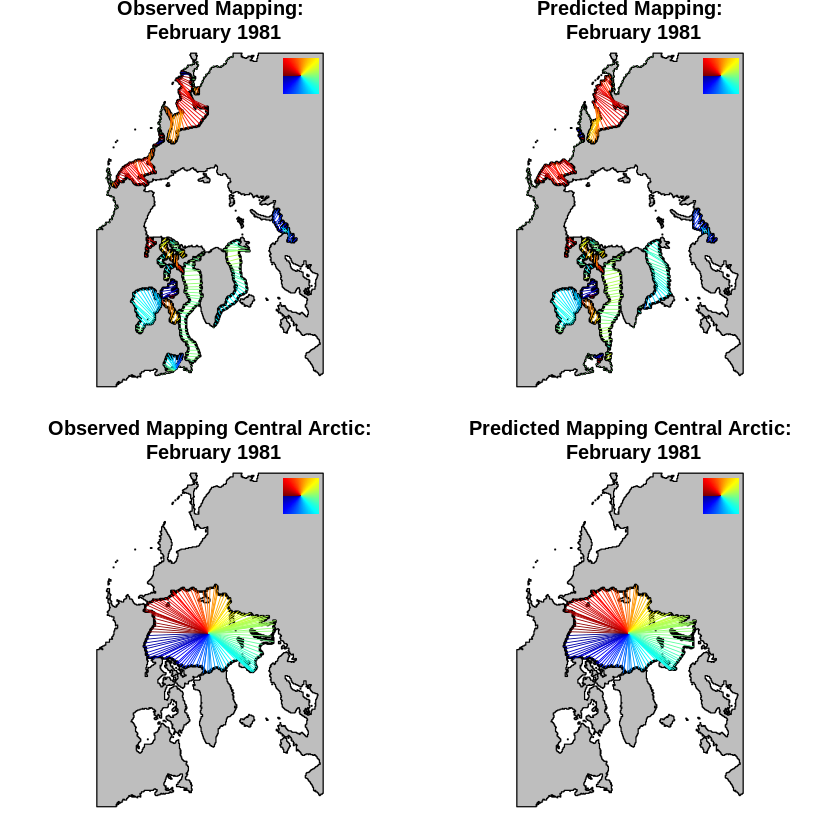

In [29]:
par(mfrow = c(2, 2), oma = rep(0, 4), mar = c(1, 1, 2, 1))
discrepDemo1 <- createMapping(startYear = 1981, endYear = 1981, 
                              obsStartYear = 1981, predStartYear = 1980,
                              observed = obsFeb19811982, predicted = emFeb19811982, 
                              regions = regionInfo,  month = 2, level = 15, 
                              datTypeObs = "bootstrap", datTypePred = "gfdl", plotting = TRUE)

In [30]:
##Not run##
discrep <- createMapping(startYear = 1981, endYear = 2011, 
                         obsStartYear = 1981, predStartYear = 1980,
                         observed = observed[,month,,],predicted = ensemMean[,month,,],
                         regions = regionInfo, month = month, level = 15,
                         datTypeObs = "bootstrap", datTypePred = "gfdl")

ERROR: Error in nrow(dat): object 'observed' not found


In [31]:
adj <- contourShift(maps = discrep, predicted = emFeb2012, bcYear = 2012, 
                    predStartYear = 2012, regions = regionInfo,  
                    level = 15, datTypePred = "gfdl")

Warning message in Polygon(onFixed):
"less than 4 coordinates in polygon"Warning message in Polygon(onFixed):
"less than 4 coordinates in polygon"Warning message in Polygon(onFixed):
"less than 4 coordinates in polygon"Warning message in Polygon(onFixed):
"less than 4 coordinates in polygon"Warning message in Polygon(onFixed):
"less than 4 coordinates in polygon"Warning message in Polygon(onFixed):
"less than 4 coordinates in polygon"Warning message in Polygon(onFixed):
"less than 4 coordinates in polygon"Warning message in Polygon(onFixed):
"less than 4 coordinates in polygon"Warning message in Polygon(onFixed):
"less than 4 coordinates in polygon"Warning message in Polygon(onFixed):
"less than 4 coordinates in polygon"Warning message in Polygon(onFixed):
"less than 4 coordinates in polygon"Warning message in Polygon(onFixed):
"less than 4 coordinates in polygon"Warning message in Polygon(onFixed):
"less than 4 coordinates in polygon"Warning message in Polygon(onFixed):
"less than 4 c

In [32]:
obs <- getRegion(dat = obsFeb2012, datType = 'bootstrap', level = 15)
unAdj <- getRegion(dat = emFeb2012, datType = 'gfdl', level = 15)

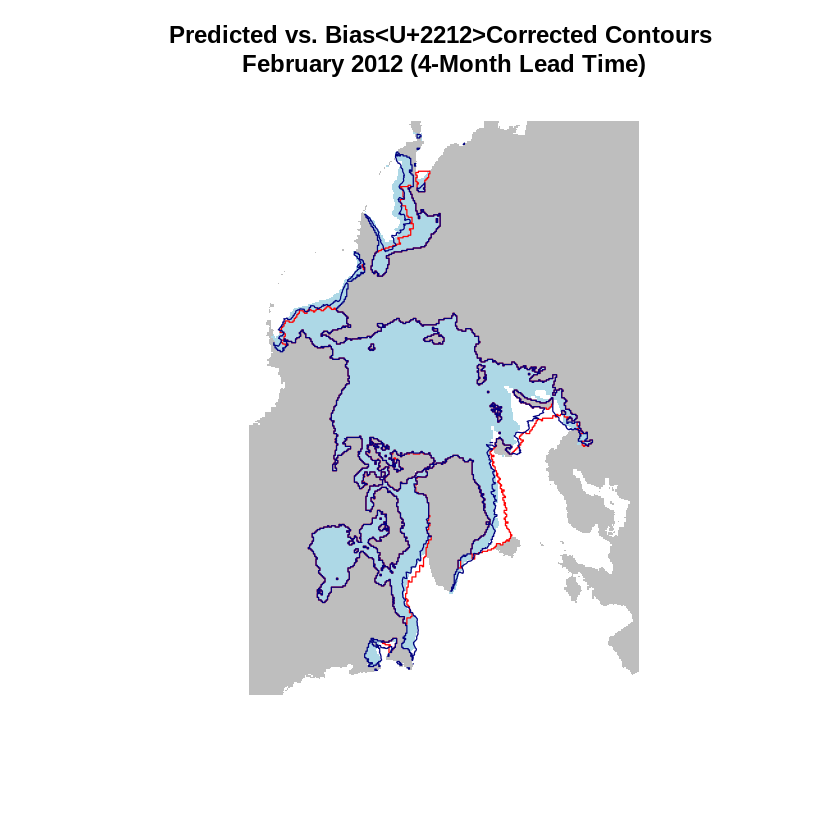

In [33]:
plot(land, col = "grey", border = F, 
     main = "Predicted vs. Bias−Corrected Contours \nFebruary 2012 (4-Month Lead Time)")
plot(obs, col = "lightblue", add = T, border = F)
plot(unAdj, border = "red", add = T)
plot(adj, border = "navy", add = T)

In [34]:
overEstUnAdj <- gDifference(obs, unAdj)
underEstUnAdj <- gDifference(unAdj, obs)
overEstAdj <- gDifference(obs, adj)
underEstAdj <- gDifference(adj, obs)

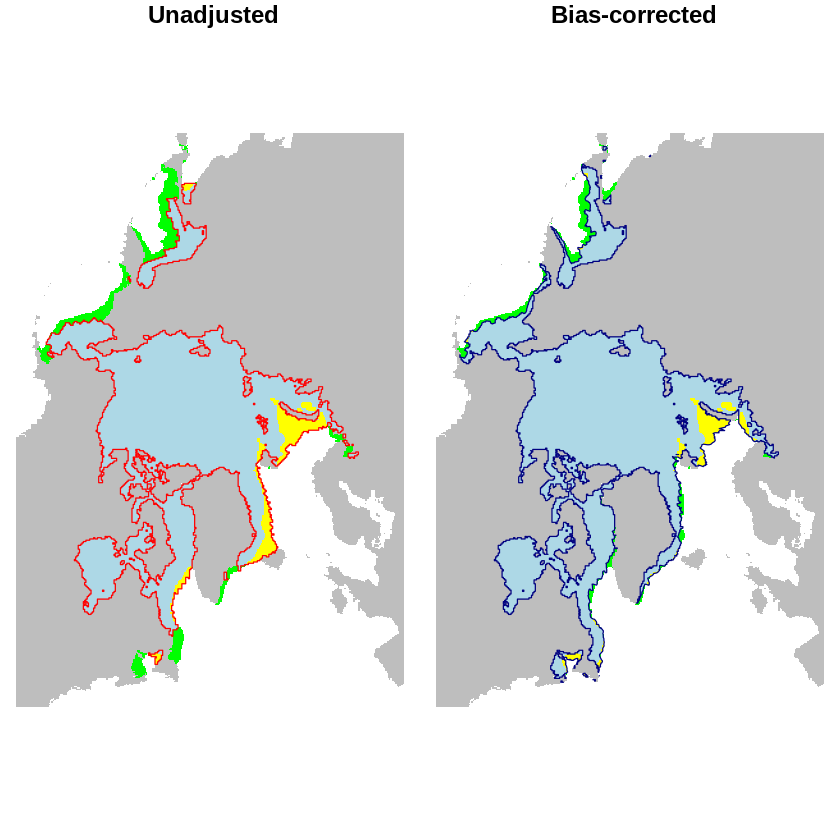

In [35]:
par(mfrow = c(1, 2), oma = rep(0, 4), mar = rep(0, 4))
#Unadjusted
plot(land, col = "grey", border = FALSE, main = "Error Regions:\n Unadjusted")
plot(obs, col = "lightblue", border = F, add = T)
plot(overEstUnAdj, col = "green", border = F, add = T)
plot(underEstUnAdj, col = "yellow", border = F, add = T)
plot(unAdj, add = T, border = "red")

#bias-corrected
plot(land, col = "grey", border = FALSE, main = "Error Regions:\n Bias-corrected")
plot(obs, col = "lightblue", border = F, add = T)
plot(overEstAdj, col = "green", border = F, add = T)
plot(underEstAdj, col = "yellow", border = F, add = T)
plot(adj, add = T, border = "navy")

In [36]:
unAdjIIEE <- getArea(overEstUnAdj) + getArea(underEstUnAdj)
adjIIEE <- getArea(overEstAdj) + getArea(underEstAdj)
IIEERed <- (unAdjIIEE - adjIIEE)/1e5 #in 10^5 km
IIEERed

[1] 8.489819

In [37]:
perRed <- 100*(unAdjIIEE - adjIIEE)/unAdjIIEE
perRed

[1] 42.18512